# Sentiment analysis

Training pipeline for sentiment analysis in Python for Applied AI class.

### Load the Twitter dataset

In [3]:
import pandas as pd

# Load the Twitter sentiment dataset from a CSV file
dataset = pd.read_csv("data/twitter_dataset.csv")

# Display the first few rows of the dataset
print(dataset.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


### Set up text preprocessing 

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Perform text normalization (lowercasing and removing special characters)
    normalized_tokens = [re.sub(r'[^a-zA-Z0-9]', '', word).lower() for word in filtered_tokens]
    
    # Join the tokens back into a string
    preprocessed_text = ' '.join(normalized_tokens)
    
    return preprocessed_text

# Example usage
text = "This is an example sentence with stopwords and special characters: $100."
print(preprocess_text(text))

example sentence stopwords special characters   100 


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dszarvas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dszarvas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Perform tokenization

In [5]:
dataset = dataset.astype({"clean_text": str})
dataset["tokenized"] = dataset["clean_text"].apply(preprocess_text)

## Perform EDA (Explanatory Data Analysis)

### Data cleaning

In [6]:
# Drop rows with N/A values since they are unusable for the task
dataset = dataset.dropna()

# Check for missing values
dataset[dataset["category"].isnull()]

,clean_text,category,tokenized


### Sentiment distribution

/home/dszarvas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


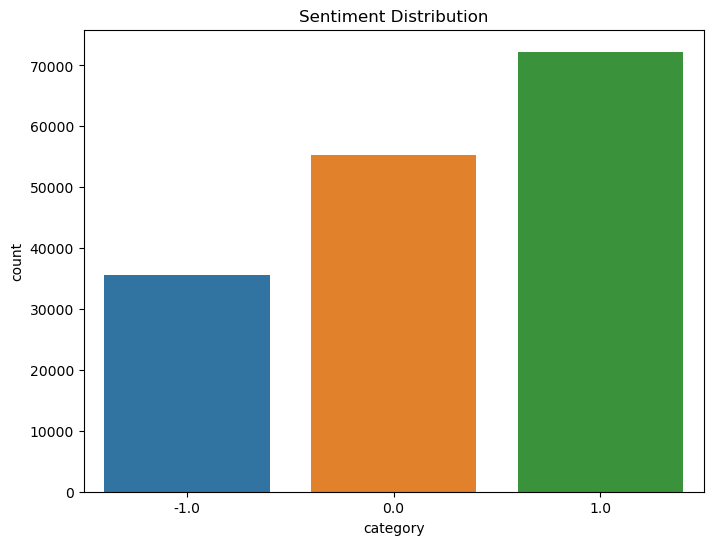

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.countplot(x="category", data=dataset)
plt.title("Sentiment Distribution")
plt.show()

### Text length distribution

/home/dszarvas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


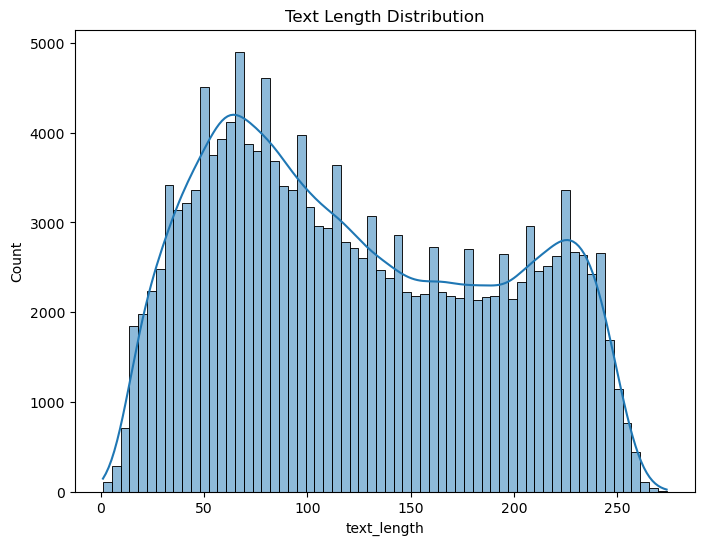

In [8]:
# Calculate text lengths and create a new column in the DataFrame
dataset['text_length'] = dataset['clean_text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='text_length', kde=True)
plt.title("Text Length Distribution")
plt.show()

## Preprocessing data

### Split dataset into train, test and validation sets

In [9]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and test sets
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=42)
validation_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# Display the sizes of the splits
print(f"Training Set Size: {len(train_df)}")
print(f"Validation Set Size: {len(validation_df)}")
print(f"Test Set Size: {len(test_df)}")

Training Set Size: 130378
Validation Set Size: 16297
Test Set Size: 16298


## Models

### Logistic regression

#### Data vectorization

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have training and validation sets (train_df and validation_df)

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['clean_text'])
X_validation_tfidf = tfidf_vectorizer.transform(validation_df['clean_text'])

# Get the corresponding labels
y_train = train_df['category']
y_validation = validation_df['category']

#### Train the model

In [11]:
# Initialize and train a Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

LogisticRegression()

#### Evaluate results

In [12]:
# Predict sentiment on the validation set
y_pred = logistic_regression.predict(X_validation_tfidf)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_validation, y_pred)
report = classification_report(y_validation, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.92
              precision    recall  f1-score   support

        -1.0       0.91      0.82      0.87      3643
         0.0       0.92      0.98      0.95      5503
         1.0       0.94      0.93      0.94      7151

    accuracy                           0.92     16297
   macro avg       0.92      0.91      0.92     16297
weighted avg       0.92      0.92      0.92     16297



/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

#### Confusion matrix

/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

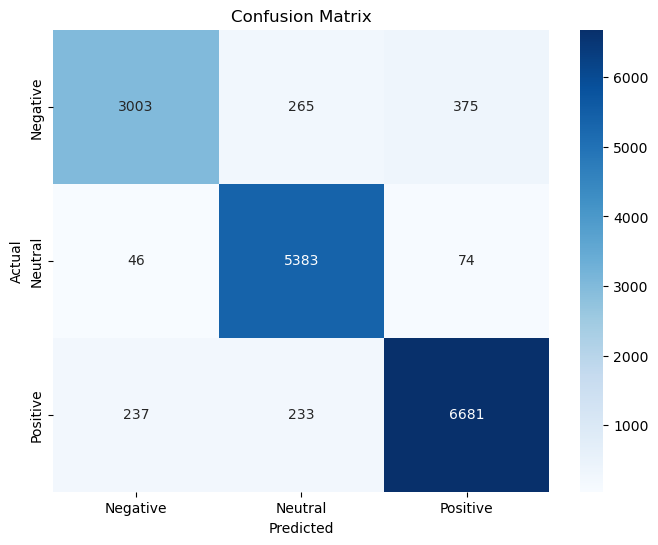

In [13]:
from sklearn.metrics import confusion_matrix

# Assuming you have already made predictions (y_true and y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_validation, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Naive Bayes model

#### Training the model

In [86]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes Model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


MultinomialNB()

#### Evaluate the results

In [87]:
# Predict sentiment on the validation set
y_pred = nb_classifier.predict(X_validation_tfidf)

# Calculate accuracy and generate a classification report
accuracy = accuracy_score(y_validation, y_pred)
report = classification_report(y_validation, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)

Accuracy: 0.74
              precision    recall  f1-score   support

        -1.0       0.91      0.42      0.58      3643
         0.0       0.88      0.68      0.77      5503
         1.0       0.66      0.95      0.78      7151

    accuracy                           0.74     16297
   macro avg       0.82      0.68      0.71     16297
weighted avg       0.79      0.74      0.73     16297



/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dszarvas/miniconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if

#### Model selection

After examining the results and metrics, I've selected the Logistic Regression model for the task.